In [74]:
%matplotlib inline
import numpy as np

from scipy.io import loadmat 
import mne, glob 
import pandas as pd
import mat73

## resting state HC vs MDD

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
X = data.iloc[:,1:-1]
y = data.iloc[:, -1]
print(X.shape)
print(y.shape)
# Encode labels (MDD -> 1, HC -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


(53, 2690)
sub-002
(53, 2688)
(53,)
[1 0 0 1 0 1 1 0 1 0 1]
[[4 1]
 [3 3]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



In [76]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[5 0]
 [3 3]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



In [77]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[5 0]
 [3 3]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



In [78]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[4 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11



In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[4 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



In [80]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[1 4]
 [4 2]]
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.33      0.33      0.33         6

    accuracy                           0.27        11
   macro avg       0.27      0.27      0.27        11
weighted avg       0.27      0.27      0.27        11



In [81]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[5 0]
 [4 2]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.33      0.50         6

    accuracy                           0.64        11
   macro avg       0.78      0.67      0.61        11
weighted avg       0.80      0.64      0.60        11



In [82]:
#!pip install xgboost

In [83]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[5 0]
 [3 3]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



## dot probe state HC vs MDD

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
X = data.iloc[:,1:-1]
y = data.iloc[:, -1]
print(X.shape)
print(y.shape)
# Encode labels (MDD -> 1, HC -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


(53, 2690)
sub-002
(53, 2688)
(53,)
[1 0 0 1 0 1 1 0 1 0 1]
[[2 3]
 [1 5]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



In [85]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[2 3]
 [1 5]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



In [86]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[2 3]
 [1 5]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[3 2]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86         6

    accuracy                           0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11



In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[4 1]
 [3 3]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



In [89]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[2 3]
 [2 4]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.57      0.67      0.62         6

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



In [90]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[4 1]
 [3 3]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



In [91]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[3 2]
 [1 5]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.71      0.83      0.77         6

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11



## resting state HC vs Task State HC

In [92]:
# Load the data
data_ts = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data_ts.shape)
data_ts_HC=data_ts.iloc[24:,1:-1]
#data_ts_HC_labels=data_ts.iloc[24:,-1]
print(data_ts_HC.shape)

(53, 2690)
(29, 2688)


In [93]:
data_rs = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data_rs.shape)
data_rs_HC=data_rs.iloc[24:,1:-1]
#data_rs_HC_labels=data_rs.iloc[24:,-1]
print(data_rs_HC.shape)

(53, 2690)
(29, 2688)


In [94]:
data_rs_HC_labels=np.zeros(data_rs_HC.shape[0])

In [95]:
print(data_rs_HC_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [96]:
data_ts_HC_labels=np.ones(data_ts_HC.shape[0])
print(data_ts_HC_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [97]:
all_features=np.concatenate((data_rs_HC,data_ts_HC),axis=0)

In [98]:
all_features.shape

(58, 2688)

In [99]:
all_labels=np.concatenate((data_rs_HC_labels,data_ts_HC_labels),axis=0)
all_labels.shape

(58,)

In [100]:
X=all_features
y=all_labels

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
[[6 0]
 [0 6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [102]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[5 1]
 [0 6]]
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [103]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[5 1]
 [0 6]]
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [104]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[5 1]
 [1 5]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [105]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[3 3]
 [0 6]]
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



In [106]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[6 0]
 [1 5]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [107]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[4 2]
 [0 6]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



In [108]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[2 4]
 [1 5]]
              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44         6
         1.0       0.56      0.83      0.67         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12



## resting state MDD vs task state MDD

In [109]:
# Load the data
data_ts = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data_ts.shape)
data_ts_MDD=data_ts.iloc[:24,1:-1]
#data_ts_HC_labels=data_ts.iloc[24:,-1]
print(data_ts_MDD.shape)

(53, 2690)
(24, 2688)


In [110]:
# Load the data
data_rs = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data_rs.shape)
data_rs_MDD=data_rs.iloc[:24,1:-1]
#data_rs_HC_labels=data_rs.iloc[24:,-1]
print(data_rs_MDD.shape)

(53, 2690)
(24, 2688)


In [111]:
data_ts_MDD_labels=np.ones(data_ts_MDD.shape[0])
print(data_ts_MDD_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [112]:
data_rs_MDD_labels=np.zeros(data_rs_MDD.shape[0])
print(data_rs_MDD_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [113]:
all_features=np.concatenate((data_rs_MDD,data_ts_MDD),axis=0)
all_features.shape

(48, 2688)

In [114]:
all_labels=np.concatenate((data_rs_MDD_labels,data_ts_MDD_labels),axis=0)
all_labels.shape

(48,)

In [115]:
X=all_features
y=all_labels

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[1. 1. 1. 1. 1. 1. 0. 0. 0. 1.]
[[3 0]
 [1 6]]
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [117]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[3 0]
 [3 4]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.57      0.73         7

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10



In [118]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[3 0]
 [3 4]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.57      0.73         7

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10



In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[2 1]
 [3 4]]
              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         3
         1.0       0.80      0.57      0.67         7

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10



In [120]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[2 1]
 [1 6]]
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         3
         1.0       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [121]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[3 0]
 [3 4]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.57      0.73         7

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10



In [122]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[2 1]
 [2 5]]
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.83      0.71      0.77         7

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



In [123]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[3 0]
 [3 4]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.57      0.73         7

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10



## resting state MDD VS task state HC

In [124]:
print(data_ts_HC.shape)
print(data_ts_HC_labels)

(29, 2688)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [125]:
print(data_rs_MDD.shape)
print(data_rs_MDD_labels)

(24, 2688)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [126]:
all_features=np.concatenate((data_rs_MDD,data_ts_HC),axis=0)
print(all_features.shape)

(53, 2688)


In [127]:
all_labels=np.concatenate((data_rs_MDD_labels,data_ts_HC_labels),axis=0)
print(all_labels.shape)

(53,)


In [128]:
X=all_features
y=all_labels

In [129]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [130]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [131]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [132]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[6 0]
 [1 4]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



In [133]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[5 1]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



In [134]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [135]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[4 2]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



In [136]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[4 2]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



## task state MDD VS resting state HC

In [137]:
print(data_ts_MDD.shape)
print(data_ts_MDD_labels)

(24, 2688)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [138]:
print(data_rs_HC.shape)
print(data_rs_HC_labels)

(29, 2688)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [140]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [141]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [142]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[6 0]
 [1 4]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



In [143]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[5 1]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



In [144]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [145]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[4 2]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



In [146]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[4 2]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



## common subjects only classification

## resting state HC and MDD

# LSTM

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#0-9,11,14-17,22-25,27-31,33-38,40,42-48
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
from tensorflow.keras.callbacks import EarlyStopping



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
X = data.iloc[indices,1:-1]
y = data.iloc[indices, -1]
print(X.shape)
print(y.shape)


#Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("shape after scaling")
print(X_scaled.shape)


X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print("shape after reshaping")
print(X_reshaped.shape)
#Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)


from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Define number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to hold results
accuracy_list = []
y_true_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    print(y_test)
    # Build and compile the model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,callbacks=[early_stopping], verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_list.append(accuracy)
    
    # Predict and store results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_true_list.extend(y_test)
    y_pred_list.extend(y_pred)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_list) * 100:.2f}%')

# Print the classification report for all folds
print(classification_report(y_true_list, y_pred_list, target_names=['HC', 'MDD']))



# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()


(53, 2690)
sub-002
38
(38, 2688)
(38,)
shape after scaling
(38, 2688)
shape after reshaping
(38, 1, 2688)
[1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0]
[1 1 1 1 0 0 0 0]
[1 1 0 0 0 0 0]
[1 1 1 0 0 0 0]
Average Accuracy: 52.86%
              precision    recall  f1-score   support

          HC       0.62      0.38      0.47        21
         MDD       0.48      0.71      0.57        17

    accuracy                           0.53        38
   macro avg       0.55      0.54      0.52        38
weighted avg       0.55      0.53      0.52        38



In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#0-9,11,14-17,22-25,27-31,33-38,40,42-48
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
from tensorflow.keras.callbacks import EarlyStopping



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
X = data.iloc[indices,1:-1]
y = data.iloc[indices, -1]
print(X.shape)
print(y.shape)


#Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("shape after scaling")
print(X_scaled.shape)

(53, 2690)
sub-002
38
(38, 2688)
(38,)
shape after scaling
(38, 2688)


In [48]:
from sklearn.model_selection import train_test_split

# Reshape X for LSTM
X = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)


In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
from keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
2/2 [==============================] - 13s 5s/step - loss: 0.6985 - accuracy: 0.5417 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 8s 4s/step - loss: 0.6884 - accuracy: 0.5833 - val_loss: 0.7025 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 8s 4s/step - loss: 0.6854 - accuracy: 0.6667 - val_loss: 0.7068 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 7s 3s/step - loss: 0.6810 - accuracy: 0.6250 - val_loss: 0.7118 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 7s 4s/step - loss: 0.6767 - accuracy: 0.5833 - val_loss: 0.7174 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 7s 3s/step - loss: 0.6819 - accuracy: 0.6250 - val_loss: 0.7240 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 7s 3s/step - loss: 0.6675 - accuracy: 0.6250 - val_loss: 0.7311 - val_accuracy: 0.3333
Epoch 8/100
2/2 [================

In [51]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


1/1 [==============================] - 0s 458ms/step - loss: 0.6920 - accuracy: 0.5000
Test Accuracy: 0.5000


In [56]:
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model for use with scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=1)

# Implement K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stopping])
    
    # Evaluate the model
    test_acc = model.score(X_test, y_test)
    results.append(test_acc)

print(f'Mean Test Accuracy: {np.mean(results):.4f}')


C:\Users\stuti\AppData\Local\Temp\ipykernel_18884\3500737624.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
2/2 [==============================] - 13s 5s/step - loss: 0.6934 - accuracy: 0.4333 - val_loss: 0.6955 - val_accuracy: 0.3750
Epoch 2/100
2/2 [==============================] - 8s 5s/step - loss: 0.6946 - accuracy: 0.4667 - val_loss: 0.6933 - val_accuracy: 0.6250
Epoch 3/100
2/2 [==============================] - 8s 4s/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.6906 - val_accuracy: 0.6250
Epoch 4/100
2/2 [==============================] - 9s 5s/step - loss: 0.6953 - accuracy: 0.4000 - val_loss: 0.6875 - val_accuracy: 0.6250
Epoch 5/100
2/2 [==============================] - 8s 4s/step - loss: 0.6955 - accuracy: 0.4333 - val_loss: 0.6863 - val_accuracy: 0.6250
Epoch 6/100
2/2 [==============================] - 8s 4s/step - loss: 0.6883 - accuracy: 0.5333 - val_loss: 0.6843 - val_accuracy: 0.6250
Epoch 7/100
2/2 [==============================] - 9s 4s/step - loss: 0.6955 - accuracy: 0.5667 - val_loss: 0.6835 - val_accuracy: 0.6250
Epoch 8/100
2/2 [================

# making 20% of the data unseen to avoid overfitting and then training with stratified k fold cross validation on 80%

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')

# Separate features and labels
X = data.iloc[indices, 1:-1].values  # Features
y = data.iloc[indices, -1].values    # Labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("shape after scaling")
print(X_scaled.shape)


X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print("shape after reshaping")
print(X_reshaped.shape)

# Split the data into two parts: 80% training (part1) and 20% unseen (part2)
X_part1, X_part2, y_part1, y_part2 = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# Cross-validation setup on the first part of the data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fold_accuracies = []
for fold, (train_index, val_index) in enumerate(kf.split(X_part1, y_part1)):
    print(f"Processing Fold {fold + 1}")
    X_train, X_val = X_part1[train_index], X_part1[val_index]
    y_train, y_val = y_part1[train_index], y_part1[val_index]
    
    # Build and compile the model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    

    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Evaluate the model on validation set
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = np.mean(y_pred == y_val)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

print("Cross-validation Accuracies:", fold_accuracies)
print("Mean Cross-validation Accuracy:", np.mean(fold_accuracies))

# # Train the final model on the entire dataset (X_part1 + X_part2)
# final_model = create_cnn_model()
X_combined_reshaped = np.concatenate([X_part1, X_part2], axis=0)
y_combined = np.concatenate([y_part1, y_part2], axis=0)
model.fit(X_combined_reshaped, y_combined, epochs=50, batch_size=8, callbacks=[early_stopping])

# Evaluate the final model on the unseen part (X_part2)
y_pred_final = (model.predict(X_part2) > 0.5).astype("int32")
print("Final Model Evaluation on Unseen Data:")
print(classification_report(y_part2, y_pred_final))
print(confusion_matrix(y_part2, y_pred_final))

# Optionally, you can also split the entire data into 80:20 again and test on that split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_combined_reshaped, y_combined, test_size=0.2, random_state=42, stratify=y_combined)
y_pred_test_full = (model.predict(X_test_full) > 0.5).astype("int32")
print("Final Model Evaluation on 20% Test Split:")
print(classification_report(y_test_full, y_pred_test_full))
print(confusion_matrix(y_test_full, y_pred_test_full))



38
shape after scaling
(38, 2688)
shape after reshaping
(38, 1, 2688)
Processing Fold 1
Epoch 1/50
3/3 [==============================] - 5s 559ms/step - loss: 0.7015 - accuracy: 0.5417 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.6472 - accuracy: 0.7500 - val_loss: 0.6774 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6571 - accuracy: 0.7083 - val_loss: 0.6658 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6146 - accuracy: 0.7917 - val_loss: 0.6603 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6136 - accuracy: 0.7500 - val_loss: 0.6549 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 28ms/step - loss: 0.5716 - accuracy: 0.8750 - val_loss: 0.6525 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5634

3/3 [==============================] - 0s 25ms/step - loss: 0.6581 - accuracy: 0.6667 - val_loss: 0.6949 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6229 - accuracy: 0.7500 - val_loss: 0.6907 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5903 - accuracy: 0.9583 - val_loss: 0.6794 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 0.5765 - accuracy: 0.9583 - val_loss: 0.6684 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5297 - accuracy: 0.9583 - val_loss: 0.6532 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.5290 - accuracy: 1.0000 - val_loss: 0.6397 - val_accuracy: 0.6667
Epoch 8/50
3/3 [==============================] - 0s 29ms/step - loss: 0.5219 - accuracy: 0.9583 - val_loss: 0.6248 - val_accuracy: 0.6667
Epoch 9/50
3/3 [======================

Epoch 34/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 1.0000
Epoch 35/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 36/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0534 - accuracy: 1.0000
Epoch 37/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0480 - accuracy: 1.0000
Epoch 38/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 39/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 40/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 41/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 42/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 43/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0418 - accuracy: 1.0000
Epoch 44/50
5/5 [====

# transformer

(53, 2690)
sub-002
38
(38, 2688)
(38,)
Epoch 1/50
2/2 [==============================] - 2s 520ms/step - loss: 1.3474 - accuracy: 0.5000 - val_loss: 24.8668 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 0s 160ms/step - loss: 4.1002 - accuracy: 0.5000 - val_loss: 0.5204 - val_accuracy: 0.8333
Epoch 3/50
2/2 [==============================] - 0s 144ms/step - loss: 3.6618 - accuracy: 0.5000 - val_loss: 6.9857 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 154ms/step - loss: 1.0666 - accuracy: 0.7500 - val_loss: 42.1154 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 151ms/step - loss: 0.7467 - accuracy: 0.7917 - val_loss: 70.6054 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 133ms/step - loss: 1.5849 - accuracy: 0.7500 - val_loss: 81.2758 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 0s 60ms/step - loss: 4.4574 - accuracy: 0.3750
Test Accuracy: 37.50

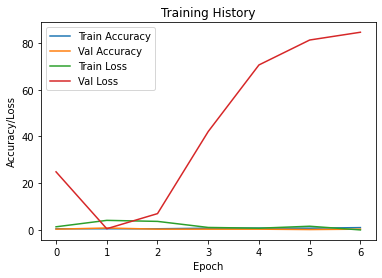

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#0-9,11,14-17,22-25,27-31,33-38,40,42-48
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
X = data.iloc[indices,1:-1]
y = data.iloc[indices, -1]
print(X.shape)
print(y.shape)


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for Transformer (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)


# Build the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#0-9,11,14-17,22-25,27-31,33-38,40,42-48
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
X = data.iloc[indices,1:-1]
y = data.iloc[indices, -1]
print(X.shape)
print(y.shape)


#Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalize the data (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print("shape after scaling")
print(X_train.shape)
print(X_test.shape)

(53, 2690)
sub-002
38
(38, 2688)
(38,)
shape after scaling
(30, 2688)
(8, 2688)


In [70]:
#!pip install transformers

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam

# Define transformer model
def transformer_block(inputs, num_heads, ff_dim, dropout_rate=0.1):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=ff_dim, dropout=dropout_rate
    )(inputs, inputs)
    attention = Dropout(dropout_rate)(attention)
    attention = Add()([inputs, attention])
    attention = LayerNormalization()(attention)

    # Feed Forward Network
    ff = Dense(ff_dim, activation='relu')(attention)
    ff = Dropout(dropout_rate)(ff)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Add()([attention, ff])
    ff = LayerNormalization()(ff)

    return ff

def create_transformer_model(input_shape, num_heads, ff_dim, dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs, num_heads, ff_dim, dropout_rate)
    x = tf.reduce_mean(x, axis=1)  # Global Average Pooling
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape based on your data
input_shape = (X_train.shape[1], 1)  # Assuming a single feature per token
X_train_expanded = np.expand_dims(X_train, axis=-1)
X_test_expanded = np.expand_dims(X_test, axis=-1)

model = create_transformer_model(input_shape, num_heads=4, ff_dim=64)

# Train the model
history = model.fit(
    X_train_expanded, y_train, 
    epochs=20, 
    batch_size=8, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_expanded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/20
3/3 [==============================] - 34s 9s/step - loss: 0.6931 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 27s 10s/step - loss: 0.6928 - accuracy: 0.6250 - val_loss: 0.6938 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 20s 7s/step - loss: 0.6925 - accuracy: 0.6250 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 20s 7s/step - loss: 0.6924 - accuracy: 0.6250 - val_loss: 0.6944 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 20s 7s/step - loss: 0.6922 - accuracy: 0.6250 - val_loss: 0.6947 - val_accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5000
Test Loss: 0.6931, Test Accuracy: 0.5000


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')

# Separate features and labels
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reshape data for transformer input
X_normalized = X_normalized.reshape((X_normalized.shape[0], 1, X_normalized.shape[1]))  # (samples, 1, features)

# Define a simple Transformer block
def transformer_block(inputs, num_heads, ff_dim):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Add()([x, inputs])
    x = tf.keras.layers.Dense(ff_dim, activation='relu')(x)
    x = tf.keras.layers.Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Add()([x, inputs])
    return x

# Build the transformer model
input_layer = Input(shape=(X_normalized.shape[1], X_normalized.shape[2]))
x = transformer_block(input_layer, num_heads=2, ff_dim=64)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for train_index, val_index in kf.split(X_normalized):
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=4,
        callbacks=[early_stopping],
        verbose=1
    )
    
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    results.append(val_accuracy)

print(f"Mean Cross-Validation Accuracy: {np.mean(results)}")

# Evaluate on the test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=4,
    callbacks=[early_stopping],
    verbose=1
)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/50
11/11 [==============================] - 6s 356ms/step - loss: 2.2129 - accuracy: 0.5000 - val_loss: 0.7548 - val_accuracy: 0.6364
Epoch 2/50
11/11 [==============================] - 3s 292ms/step - loss: 1.3975 - accuracy: 0.6429 - val_loss: 1.3053 - val_accuracy: 0.6364
Epoch 3/50
11/11 [==============================] - 3s 293ms/step - loss: 1.2390 - accuracy: 0.7143 - val_loss: 0.7952 - val_accuracy: 0.6364
Epoch 4/50
11/11 [==============================] - 3s 302ms/step - loss: 0.5364 - accuracy: 0.7857 - val_loss: 0.5520 - val_accuracy: 0.6364
Epoch 5/50
11/11 [==============================] - 3s 289ms/step - loss: 0.5847 - accuracy: 0.7619 - val_loss: 0.7231 - val_accuracy: 0.8182
Epoch 6/50
11/11 [==============================] - 3s 291ms/step - loss: 0.6199 - accuracy: 0.9286 - val_loss: 0.8409 - val_accuracy: 0.5455
Epoch 7/50
11/11 [==============================] - 3s 292ms/step - loss: 0.1132 - accuracy: 0.9524 - val_loss: 0.7251 - val_accuracy: 0.7273
Epoch 

Epoch 24/50
11/11 [==============================] - 3s 313ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 6.3796e-04 - val_accuracy: 1.0000
Epoch 25/50
11/11 [==============================] - 3s 296ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 26/50
11/11 [==============================] - 3s 298ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 27/50
11/11 [==============================] - 3s 297ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 28/50
11/11 [==============================] - 3s 302ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 29/50
1/1 [==============================] - 0s 80ms/step - loss: 6.3796e-04 - accuracy: 1.0000
Epoch 1/50
11/11 [==============================] - 4s 328ms/step - loss: 0.0206 - accuracy: 0.9767 - val_loss: 5.0709e-05 - val_accuracy: 1.0000
Epoch 2/50
11/11 [===============

11/11 [==============================] - 3s 317ms/step - loss: 2.4976e-05 - accuracy: 1.0000 - val_loss: 4.9825e-08 - val_accuracy: 1.0000
Epoch 7/50
11/11 [==============================] - 3s 316ms/step - loss: 9.8726e-04 - accuracy: 1.0000 - val_loss: 5.2002e-08 - val_accuracy: 1.0000
Epoch 8/50
11/11 [==============================] - 3s 317ms/step - loss: 8.7750e-04 - accuracy: 1.0000 - val_loss: 5.3147e-08 - val_accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# making 20% data unseen at the beginning to avoid overfitting and using rest for stratified k fold cross validation

In [11]:



# for train_index, val_index in kf.split(X_normalized):
#     X_train, X_val = X_normalized[train_index], X_normalized[val_index]
#     y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_val, y_val),
#         epochs=50,
#         batch_size=4,
#         callbacks=[early_stopping],
#         verbose=1
#     )
    
#     val_loss, val_accuracy = model.evaluate(X_val, y_val)
#     results.append(val_accuracy)

# print(f"Mean Cross-Validation Accuracy: {np.mean(results)}")

# # Evaluate on the test set
# X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=50,
#     batch_size=4,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # Predict and evaluate
# y_pred = (model.predict(X_test) > 0.5).astype(int)
# print(classification_report(y_test, y_pred))

from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))

# Separate features and labels
X = data.iloc[indices, 1:-1].values  # Features
y = data.iloc[indices, -1].values    # Labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0


# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reshape data for transformer input
X_normalized = X_normalized.reshape((X_normalized.shape[0], 1, X_normalized.shape[1]))  # (samples, 1, features)

# Split the data into two parts: 80% training (part1) and 20% unseen (part2)
X_part1, X_part2, y_part1, y_part2 = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# Define a simple Transformer block
def transformer_block(inputs, num_heads, ff_dim):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Add()([x, inputs])
    x = tf.keras.layers.Dense(ff_dim, activation='relu')(x)
    x = tf.keras.layers.Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Add()([x, inputs])
    return x

# Build the transformer model
input_layer = Input(shape=(X_part1.shape[1], X_part1.shape[2]))
x = transformer_block(input_layer, num_heads=2, ff_dim=64)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Cross-validation setup on the first part of the data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fold_accuracies = []
for fold, (train_index, val_index) in enumerate(kf.split(X_part1, y_part1)):
    print(f"Processing Fold {fold + 1}")
    X_train, X_val = X_part1[train_index], X_part1[val_index]
    y_train, y_val = y_part1[train_index], y_part1[val_index]
    
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Evaluate the model on validation set
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = np.mean(y_pred == y_val)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

print("Cross-validation Accuracies:", fold_accuracies)
print("Mean Cross-validation Accuracy:", np.mean(fold_accuracies))


X_combined_reshaped = np.concatenate([X_part1, X_part2], axis=0)
y_combined = np.concatenate([y_part1, y_part2], axis=0)
model.fit(X_combined_reshaped, y_combined, epochs=50, batch_size=8, callbacks=[early_stopping])

# Evaluate the final model on the unseen part (X_part2)
y_pred_final = (model.predict(X_part2) > 0.5).astype("int32")
print("Final Model Evaluation on Unseen Data:")
print(classification_report(y_part2, y_pred_final))
print(confusion_matrix(y_part2, y_pred_final))

# Optionally, you can also split the entire data into 80:20 again and test on that split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_combined_reshaped, y_combined, test_size=0.2, random_state=42, stratify=y_combined)
y_pred_test_full = (model.predict(X_test_full) > 0.5).astype("int32")
print("Final Model Evaluation on 20% Test Split:")
print(classification_report(y_test_full, y_pred_test_full))
print(confusion_matrix(y_test_full, y_pred_test_full))


38
Processing Fold 1
Epoch 1/50
3/3 [==============================] - 3s 658ms/step - loss: 1.6615 - accuracy: 0.5833 - val_loss: 0.3474 - val_accuracy: 0.8333
Epoch 2/50
3/3 [==============================] - 1s 380ms/step - loss: 1.8883 - accuracy: 0.5000 - val_loss: 0.8411 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 393ms/step - loss: 0.5567 - accuracy: 0.8333 - val_loss: 1.1252 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 460ms/step - loss: 0.5729 - accuracy: 0.7500 - val_loss: 0.3155 - val_accuracy: 0.8333
Epoch 5/50
3/3 [==============================] - 1s 397ms/step - loss: 0.8351 - accuracy: 0.7083 - val_loss: 0.4864 - val_accuracy: 0.8333
Epoch 6/50
3/3 [==============================] - 1s 383ms/step - loss: 0.2385 - accuracy: 0.8750 - val_loss: 1.2681 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 388ms/step - loss: 0.4952 - accuracy: 0.8333 - val_loss: 1.1077 - val_accuracy: 0.5000

Epoch 12/50
3/3 [==============================] - 1s 320ms/step - loss: 0.0570 - accuracy: 0.9583 - val_loss: 5.6814e-05 - val_accuracy: 1.0000
Epoch 13/50
3/3 [==============================] - 1s 310ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.1060e-04 - val_accuracy: 1.0000
Epoch 14/50
3/3 [==============================] - 1s 319ms/step - loss: 0.1149 - accuracy: 0.9167 - val_loss: 4.3517e-04 - val_accuracy: 1.0000
Fold 5 Accuracy: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[3 0]
 [0 3]]
Cross-validation Accuracies: [0.6111111111111112, 0.5555555555555556, 0.5, 0.5, 0.5]
Mean Cross-validation Accuracy: 0.5333333333333334
Epoch 1/50
5/5 [==============================] - 2s 296ms/step - 

5/5 [==============================] - 1s 278ms/step - loss: 0.0189 - accuracy: 0.9737
Epoch 25/50
5/5 [==============================] - 1s 280ms/step - loss: 1.3941e-04 - accuracy: 1.0000
Epoch 26/50
5/5 [==============================] - 1s 278ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 27/50
5/5 [==============================] - 1s 278ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 28/50
5/5 [==============================] - 1s 281ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 29/50
5/5 [==============================] - 1s 301ms/step - loss: 6.3119e-04 - accuracy: 1.0000
Epoch 30/50
5/5 [==============================] - 1s 284ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 31/50
5/5 [==============================] - 1s 280ms/step - loss: 1.2640e-04 - accuracy: 1.0000
Epoch 32/50
5/5 [==============================] - 1s 286ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 33/50
5/5 [==============================] - 1s 277ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 34/5

Final Model Evaluation on Unseen Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[4 0]
 [0 4]]
Final Model Evaluation on 20% Test Split:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[4 0]
 [0 4]]


# cnn

(53, 2690)
sub-002
38
(38, 2688)
(38,)
Epoch 1/50
2/2 [==============================] - 1s 264ms/step - loss: 1.7275 - accuracy: 0.3333 - val_loss: 0.5952 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 0s 78ms/step - loss: 1.0729 - accuracy: 0.4167 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 83ms/step - loss: 0.5850 - accuracy: 0.5833 - val_loss: 1.3883 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 78ms/step - loss: 0.3546 - accuracy: 0.7917 - val_loss: 1.6314 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 85ms/step - loss: 0.6765 - accuracy: 0.6250 - val_loss: 1.3587 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 86ms/step - loss: 0.4392 - accuracy: 0.8333 - val_loss: 0.9049 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 0s 77ms/step - loss: 0.4382 - accuracy: 0.7917 - val_loss: 0.7287 - val_accu

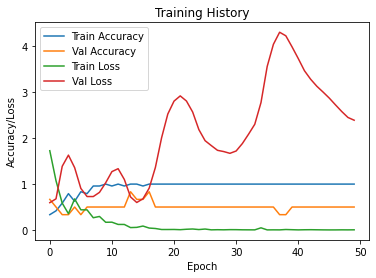

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
#0-9,11,14-17,22-25,27-31,33-38,40,42-48

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])
# Separate features and labels
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
X = data.iloc[indices,1:-1]
y = data.iloc[indices, -1]
print(X.shape)
print(y.shape)

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,  verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
print(data.iloc[1,0])

# Separate features and labels
indices = list(range(38))  # Include all rows
X = data.iloc[indices, 1:-1].values  # Features
y = data.iloc[indices, -1].values    # Labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN input: (samples, height, width, channels)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1], 1)

# Define the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (1, 10), activation='relu', input_shape=(1, X_scaled.shape[1], 1)))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Conv2D(64, (1, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for train_index, val_index in kf.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    # Create and train the model
    model = create_cnn_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Evaluate the model
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    print("Validation Report for Fold:")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

# Train the final model on the entire dataset
final_model = create_cnn_model()
final_model.fit(X_reshaped, y_encoded, epochs=50, batch_size=8, callbacks=[early_stopping])

# Optionally, evaluate the final model on a separate test set if available
# For demonstration purposes, we can use the validation data from the last fold
X_test, y_test = X_val, y_val
y_pred_final = (final_model.predict(X_test) > 0.5).astype("int32")
print("Final Model Evaluation:")
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


(53, 2690)
sub-002
Epoch 1/50
4/4 [==============================] - 1s 139ms/step - loss: 0.9813 - accuracy: 0.7000 - val_loss: 0.7643 - val_accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 49ms/step - loss: 0.9121 - accuracy: 0.6000 - val_loss: 0.7805 - val_accuracy: 0.6250
Epoch 3/50
4/4 [==============================] - 0s 48ms/step - loss: 0.4582 - accuracy: 0.7667 - val_loss: 0.9613 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 51ms/step - loss: 0.2192 - accuracy: 0.9333 - val_loss: 0.8514 - val_accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 53ms/step - loss: 0.2205 - accuracy: 0.9333 - val_loss: 0.8553 - val_accuracy: 0.6250
Epoch 6/50
4/4 [==============================] - 0s 61ms/step - loss: 0.1714 - accuracy: 0.9333 - val_loss: 0.9137 - val_accuracy: 0.6250
Validation Report for Fold:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
         

C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Epoch 1/50
5/5 [==============================] - 1s 35ms/step - loss: 1.5149 - accuracy: 0.5263
Epoch 2/50
5/5 [==============================] - 0s 37ms/step - loss: 0.5229 - accuracy: 0.7368
Epoch 3/50
5/5 [==============================] - 0s 45ms/step - loss: 0.6280 - accuracy: 0.6579
Epoch 4/50
5/5 [==============================] - 0s 42ms/step - loss: 0.4607 - accuracy: 0.8158
Epoch 5/50
5/5 [==============================] - 0s 49ms/step - loss: 0.3229 - accuracy: 0.8158
Epoch 6/50
5/5 [==============================] - 0s 42ms/step - loss: 0.2485 - accuracy: 0.8947
Epoch 7/50
5/5 [==============================] - 0s 42ms/step - loss: 0.1616 - accuracy: 0.9474
Epoch 8/50
5/5 [==============================] - 0s 45ms/step - loss: 0.1156 - accuracy: 0.9474
Epoch 9/50
5/5 [==============================] - 0s 38ms/step - loss: 0.1034 - accuracy: 0.9474
Epoch 10/50
5/5 [==============================] - 0s 35ms/step - loss: 0.1392 - accuracy: 0.9737
Epoch 11/50
5/5 [============

Epoch 28/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 29/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 30/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0227 - accuracy: 0.9737
Epoch 31/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 32/50
5/5 [==============================] - 0s 34ms/step - loss: 8.6168e-04 - accuracy: 1.0000
Epoch 33/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 34/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 35/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0221 - accuracy: 0.9737
Epoch 36/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 37/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 38/50
5/5 

# making 20% unseen data and training on rest to avoid overfitting

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')

# Separate features and labels
X = data.iloc[indices, 1:-1].values  # Features
y = data.iloc[indices, -1].values    # Labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Split the data into two parts: 80% training (part1) and 20% unseen (part2)
X_part1, X_part2, y_part1, y_part2 = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalize the data
scaler = StandardScaler()
X_part1_scaled = scaler.fit_transform(X_part1)
X_part2_scaled = scaler.transform(X_part2)

# Reshape for CNN input: (samples, height, width, channels)
X_part1_reshaped = X_part1_scaled.reshape(X_part1_scaled.shape[0], 1, X_part1_scaled.shape[1], 1)
X_part2_reshaped = X_part2_scaled.reshape(X_part2_scaled.shape[0], 1, X_part2_scaled.shape[1], 1)

# Define a CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(16, (1, 5), activation='relu', input_shape=(1, X_part1_scaled.shape[1], 1)))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup on the first part of the data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fold_accuracies = []
for fold, (train_index, val_index) in enumerate(kf.split(X_part1_reshaped, y_part1)):
    print(f"Processing Fold {fold + 1}")
    X_train, X_val = X_part1_reshaped[train_index], X_part1_reshaped[val_index]
    y_train, y_val = y_part1[train_index], y_part1[val_index]
    
    # Create and train the model
    model = create_cnn_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Evaluate the model on validation set
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = np.mean(y_pred == y_val)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

print("Cross-validation Accuracies:", fold_accuracies)
print("Mean Cross-validation Accuracy:", np.mean(fold_accuracies))

# Train the final model on the entire dataset (X_part1 + X_part2)
final_model = create_cnn_model()
X_combined_reshaped = np.concatenate([X_part1_reshaped, X_part2_reshaped], axis=0)
y_combined = np.concatenate([y_part1, y_part2], axis=0)
final_model.fit(X_combined_reshaped, y_combined, epochs=50, batch_size=8, callbacks=[early_stopping])

# Evaluate the final model on the unseen part (X_part2)
y_pred_final = (final_model.predict(X_part2_reshaped) > 0.5).astype("int32")
print("Final Model Evaluation on Unseen Data:")
print(classification_report(y_part2, y_pred_final))
print(confusion_matrix(y_part2, y_pred_final))

# Optionally, you can also split the entire data into 80:20 again and test on that split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_combined_reshaped, y_combined, test_size=0.2, random_state=42, stratify=y_combined)
y_pred_test_full = (final_model.predict(X_test_full) > 0.5).astype("int32")
print("Final Model Evaluation on 20% Test Split:")
print(classification_report(y_test_full, y_pred_test_full))
print(confusion_matrix(y_test_full, y_pred_test_full))


38
Processing Fold 1
Epoch 1/50
3/3 [==============================] - 1s 92ms/step - loss: 0.8547 - accuracy: 0.5000 - val_loss: 0.8056 - val_accuracy: 0.6667
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 1.0731 - accuracy: 0.6250 - val_loss: 0.8895 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 1.3865 - accuracy: 0.7083 - val_loss: 0.4307 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.6096 - accuracy: 0.5833 - val_loss: 0.8970 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 0.8868 - accuracy: 0.6250 - val_loss: 0.8975 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 34ms/step - loss: 0.3239 - accuracy: 0.8333 - val_loss: 0.6542 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 0.3427 - accuracy: 0.7917 - val_loss: 0.7265 - val_accuracy: 0.6667
Epoch 

C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuti\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

5/5 [==============================] - 1s 11ms/step - loss: 5.6227 - accuracy: 0.4737
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 3.9759 - accuracy: 0.5789
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 1.2233 - accuracy: 0.7368
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 0.8194 - accuracy: 0.7368
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 0.3240 - accuracy: 0.8421
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4008 - accuracy: 0.8947
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1536 - accuracy: 0.9474
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 0.1248 - accuracy: 0.9737
Epoch 9/50
5/5 [==============================] - 0s 15ms/step - loss: 0.1197 - accuracy: 0.9737
Epoch 10/50
5/5 [==============================] - 0s 15ms/step - loss: 0.1178 - accuracy: 0.9737
Epoch 11/50
5/5 [=======================

Epoch 28/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.9737
Epoch 29/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 30/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 31/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 32/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 33/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0418 - accuracy: 0.9737
Epoch 34/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 35/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0314 - accuracy: 0.9737
Epoch 36/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 37/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 38/50
5/5 [====

# random forest

In [20]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Load the data
# data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
# print(data.shape)
# print(data.iloc[1,0])
# indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
# print(len(indices))
# # Separate features and labels
# X = data.iloc[indices,1:-1]
# y = data.iloc[indices, -1]
# print(X.shape)
# print(y.shape)
# # Encode labels (MDD -> 1, HC -> 0)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Initialize and train the model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)
# print(y_test)
# # Evaluate the model
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


(53, 2690)
sub-002
38
(38, 2688)
(38,)
[0 0 1 1 0 0 1 0]
[[3 2]
 [2 1]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.33      0.33      0.33         3

    accuracy                           0.50         8
   macro avg       0.47      0.47      0.47         8
weighted avg       0.50      0.50      0.50         8



# with stratified k fold cross validation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data.shape)
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
# Separate features and labels
X = data.iloc[indices, 1:-1]  # Features
y = data.iloc[indices, -1]    # Labels
print(X.shape)
print(y.shape)

# Encode labels (MDD -> 1, HC -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# # Initial 80:20 split of the entire dataset
# X_train_full, X_unseen, y_train_full, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Apply stratified k-fold cross-validation on the first 80%
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_full = scaler.fit_transform(X_train_full)
# X_unseen = scaler.transform(X_unseen)

# # Cross-validation and training on the 80% data
# for fold, (train_index, val_index) in enumerate(kf.split(X_train_full, y_train_full)):
#     print(f"Processing Fold {fold + 1}")
#     X_train, X_val = X_train_full[train_index], X_train_full[val_index]
#     y_train, y_val = y_train_full[train_index], y_train_full[val_index]
    
#     # Initialize and train the model
#     model = RandomForestClassifier(random_state=42)
#     model.fit(X_train, y_train)
    
#     # Make predictions on validation set
#     y_val_pred = model.predict(X_val)
    
#     # Evaluate the model on validation set
#     print(f"Validation Report for Fold {fold + 1}:")
#     print(confusion_matrix(y_val, y_val_pred))
#     print(classification_report(y_val, y_val_pred))

# # After cross-validation, train the model on the entire 80% dataset
# model_final = RandomForestClassifier(random_state=42)
# model_final.fit(X, y)

# # Evaluate the final model on the unseen 20% data
# y_unseen_pred = (model.predict(X_unseen)>0.5).astype("int32")
# print("Final Model Evaluation on Unseen Data:")
# print(confusion_matrix(y_unseen, y_unseen_pred))
# print(classification_report(y_unseen, y_unseen_pred))

# # Optionally, you can also split the entire data into 80:20 again and test on that split
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# y_pred_test_full = (model.predict(X_test_full) > 0.5).astype("int32")
# print("Final Model Evaluation on 20% Test Split:")
# print(classification_report(y_test_full, y_pred_test_full))
# print(confusion_matrix(y_test_full, y_pred_test_full))

(53, 2690)
38
(38, 2688)
(38,)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.5666666666666667
Classification Report:
              precision    recall  f1-score   support

          HC       0.43      0.75      0.55         4
         MDD       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8

Confusion Matrix:
[[3 1]
 [4 0]]


# logistic regression

In [3]:
# from sklearn.linear_model import LogisticRegression

# # Initialize and train the model
# logistic_model = LogisticRegression(random_state=42)
# logistic_model.fit(X_train, y_train)

# # Make predictions
# y_pred_logistic = logistic_model.predict(X_test)

# # Evaluate the model
# print("Logistic Regression")
# print(confusion_matrix(y_test, y_pred_logistic))
# print(classification_report(y_test, y_pred_logistic))


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_log_reg = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_log_reg.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Score: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          HC       0.60      0.75      0.67         4
         MDD       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[3 1]
 [2 2]]


# svc


In [5]:
# from sklearn.svm import SVC

# # Initialize and train the model
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)

# # Make predictions
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate the model
# print("Support Vector Machine")
# print(confusion_matrix(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SVC
svc = SVC(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly' kernels
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_svc = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_svc.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.6
Classification Report:
              precision    recall  f1-score   support

          HC       0.60      0.75      0.67         4
         MDD       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[3 1]
 [2 2]]


# KNeighborsClassifier

In [7]:
# from sklearn.neighbors import KNeighborsClassifier

# # Initialize and train the model
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)

# # Make predictions
# y_pred_knn = knn_model.predict(X_test)

# # Evaluate the model
# print("K-Nearest Neighbors")
# print(confusion_matrix(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_knn = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.6
Classification Report:
              precision    recall  f1-score   support

          HC       0.57      1.00      0.73         4
         MDD       1.00      0.25      0.40         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8

Confusion Matrix:
[[4 0]
 [3 1]]


# gradient boosting 

In [9]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Initialize and train the model
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_gb = gb_model.predict(X_test)

# # Evaluate the model
# print("Gradient Boosting")
# print(confusion_matrix(y_test, y_pred_gb))
# print(classification_report(y_test, y_pred_gb))


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_gbm = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_gbm.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.5333333333333333
Classification Report:
              precision    recall  f1-score   support

          HC       0.40      0.50      0.44         4
         MDD       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8

Confusion Matrix:
[[2 2]
 [3 1]]


# naive bayes

In [11]:
# from sklearn.naive_bayes import GaussianNB

# # Initialize and train the model
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_nb = nb_model.predict(X_test)

# # Evaluate the model
# print("Naive Bayes")
# print(confusion_matrix(y_test, y_pred_nb))
# print(classification_report(y_test, y_pred_nb))


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GaussianNB classifier
gnb = GaussianNB()

# Note: GaussianNB doesn't have many hyperparameters to tune, so we'll fit it directly

# Fit the model using cross-validation
cv_scores = []
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the training fold
    gnb.fit(X_train_fold, y_train_fold)
    
    # Evaluate on the validation fold
    score = gnb.score(X_val_fold, y_val_fold)
    cv_scores.append(score)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", sum(cv_scores) / len(cv_scores))

# Train the final model on the full training set
gnb.fit(X_train, y_train)

# Evaluate on the test set
y_pred = gnb.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-validation scores: [0.8333333333333334, 0.5, 0.16666666666666666, 0.16666666666666666, 0.6666666666666666]
Mean cross-validation score: 0.4666666666666667
Classification Report:
              precision    recall  f1-score   support

          HC       0.00      0.00      0.00         4
         MDD       0.20      0.25      0.22         4

    accuracy                           0.12         8
   macro avg       0.10      0.12      0.11         8
weighted avg       0.10      0.12      0.11         8

Confusion Matrix:
[[0 4]
 [3 1]]


# decision tree

In [13]:
# from sklearn.tree import DecisionTreeClassifier

# # Initialize and train the model
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)

# # Make predictions
# y_pred_dt = dt_model.predict(X_test)

# # Evaluate the model
# print("Decision Tree")
# print(confusion_matrix(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_dt = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_dt.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.5333333333333333
Classification Report:
              precision    recall  f1-score   support

          HC       1.00      0.75      0.86         4
         MDD       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

Confusion Matrix:
[[3 1]
 [0 4]]


# XGBoost

In [15]:
# from xgboost import XGBClassifier

# # Initialize and train the model
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# print("XGBoost")
# print(confusion_matrix(y_test, y_pred_xgb))
# print(classification_report(y_test, y_pred_xgb))


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.5333333333333333
Classification Report:
              precision    recall  f1-score   support

          HC       0.43      0.75      0.55         4
         MDD       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8

Confusion Matrix:
[[3 1]
 [4 0]]


C:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## dot probe state HC vs MDD

# lstm

In [17]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.utils import to_categorical

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# #0-9,11,14-17,22-25,27-31,33-38,40,42-48


# np.random.seed(42)
# tf.random.set_seed(42)
# random.seed(42)

# # Load the data
# data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
# print(data.shape)
# print(data.iloc[1,0])
# # Separate features and labels
# indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
# print(len(indices))
# X = data.iloc[indices,1:-1]
# y = data.iloc[indices, -1]
# print(X.shape)
# print(y.shape)


# #Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# # Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# print("shape after scaling")
# print(X_scaled.shape)
# # Reshape data for LSTM (samples, timesteps, features)
# # Assuming each sample is treated as a single timestep
# X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
# print("shape after reshaping")
# print(X_reshaped.shape)
# #Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)



# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()


# transformer

In [18]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
# from tensorflow.keras.models import Model

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.utils import to_categorical

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# #0-9,11,14-17,22-25,27-31,33-38,40,42-48

# np.random.seed(42)
# tf.random.set_seed(42)
# random.seed(42)

# # Load the data
# data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
# print(data.shape)
# print(data.iloc[1,0])
# # Separate features and labels
# indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
# print(len(indices))
# X = data.iloc[indices,1:-1]
# y = data.iloc[indices, -1]
# print(X.shape)
# print(y.shape)


# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# # Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Reshape data for Transformer (samples, timesteps, features)
# X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# # Build the Transformer model
# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = LayerNormalization(epsilon=1e-6)(inputs)
#     x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
#     x = Dropout(dropout)(x)
#     res = x + inputs

#     # Feed Forward Part
#     x = LayerNormalization(epsilon=1e-6)(res)
#     x = Dense(ff_dim, activation="relu")(x)
#     x = Dropout(dropout)(x)
#     x = Dense(inputs.shape[-1])(x)
#     return x + res

# input_shape = (X_train.shape[1], X_train.shape[2])
# inputs = Input(shape=input_shape)
# x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
# x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(20, activation="relu")(x)
# x = Dropout(0.1)(x)
# outputs = Dense(1, activation="sigmoid")(x)

# model = Model(inputs, outputs)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()

## cnn

In [19]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# #0-9,11,14-17,22-25,27-31,33-38,40,42-48

# # Load the data
# data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
# print(data.shape)
# print(data.iloc[1,0])
# # Separate features and labels
# indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
# print(len(indices))
# X = data.iloc[indices,1:-1]
# y = data.iloc[indices, -1]
# print(X.shape)
# print(y.shape)

# # np.random.seed(42)
# # tf.random.set_seed(42)
# # random.seed(42)

# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# # Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Reshape data for CNN (samples, timesteps, features)
# X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# # Build the CNN model
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,  verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()


## random forest

In [20]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Load the data
# data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
# print(data.shape)
# print(data.iloc[1,0])
# # Separate features and labels
# X = data.iloc[indices,1:-1]
# y = data.iloc[indices, -1]
# print(X.shape)
# print(y.shape)
# # Encode labels (MDD -> 1, HC -> 0)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Initialize and train the model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)
# print(y_test)
# # Evaluate the model
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data.shape)
indices=[0,1,2,3,4,5,6,7,8,9,11,14,15,16,17,22,23,24,25,27,28,29,30,31,33,34,35,36,37,38,40,42,43,44,45,46,47,48]
print(len(indices))
# Separate features and labels
X = data.iloc[indices, 1:-1]  # Features
y = data.iloc[indices, -1]    # Labels
print(X.shape)
print(y.shape)

# Encode labels (MDD -> 1, HC -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# # Initial 80:20 split of the entire dataset
# X_train_full, X_unseen, y_train_full, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Apply stratified k-fold cross-validation on the first 80%
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_full = scaler.fit_transform(X_train_full)
# X_unseen = scaler.transform(X_unseen)

# # Cross-validation and training on the 80% data
# for fold, (train_index, val_index) in enumerate(kf.split(X_train_full, y_train_full)):
#     print(f"Processing Fold {fold + 1}")
#     X_train, X_val = X_train_full[train_index], X_train_full[val_index]
#     y_train, y_val = y_train_full[train_index], y_train_full[val_index]
    
#     # Initialize and train the model
#     model = RandomForestClassifier(random_state=42)
#     model.fit(X_train, y_train)
    
#     # Make predictions on validation set
#     y_val_pred = model.predict(X_val)
    
#     # Evaluate the model on validation set
#     print(f"Validation Report for Fold {fold + 1}:")
#     print(confusion_matrix(y_val, y_val_pred))
#     print(classification_report(y_val, y_val_pred))

# # After cross-validation, train the model on the entire 80% dataset
# model_final = RandomForestClassifier(random_state=42)
# model_final.fit(X, y)

# # Evaluate the final model on the unseen 20% data
# y_unseen_pred = (model.predict(X_unseen)>0.5).astype("int32")
# print("Final Model Evaluation on Unseen Data:")
# print(confusion_matrix(y_unseen, y_unseen_pred))
# print(classification_report(y_unseen, y_unseen_pred))

# # Optionally, you can also split the entire data into 80:20 again and test on that split
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# y_pred_test_full = (model.predict(X_test_full) > 0.5).astype("int32")
# print("Final Model Evaluation on 20% Test Split:")
# print(classification_report(y_test_full, y_pred_test_full))
# print(confusion_matrix(y_test_full, y_pred_test_full))

(53, 2690)
38
(38, 2688)
(38,)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.6666666666666667
Classification Report:
              precision    recall  f1-score   support

          HC       0.75      0.75      0.75         4
         MDD       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8

Confusion Matrix:
[[3 1]
 [1 3]]


## logistic regression

In [2]:
# from sklearn.linear_model import LogisticRegression

# # Initialize and train the model
# logistic_model = LogisticRegression(random_state=42)
# logistic_model.fit(X_train, y_train)

# # Make predictions
# y_pred_logistic = logistic_model.predict(X_test)

# # Evaluate the model
# print("Logistic Regression")
# print(confusion_matrix(y_test, y_pred_logistic))
# print(classification_report(y_test, y_pred_logistic))


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_log_reg = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_log_reg.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Score: 0.6666666666666667
Classification Report:
              precision    recall  f1-score   support

          HC       0.67      0.50      0.57         4
         MDD       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[2 2]
 [1 3]]


## svc

In [4]:
# from sklearn.svm import SVC

# # Initialize and train the model
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)

# # Make predictions
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate the model
# print("Support Vector Machine")
# print(confusion_matrix(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SVC
svc = SVC(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly' kernels
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_svc = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_svc.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

          HC       0.57      1.00      0.73         4
         MDD       1.00      0.25      0.40         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8

Confusion Matrix:
[[4 0]
 [3 1]]


# k neighbours

In [6]:
# from sklearn.neighbors import KNeighborsClassifier

# # Initialize and train the model
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)

# # Make predictions
# y_pred_knn = knn_model.predict(X_test)

# # Evaluate the model
# print("K-Nearest Neighbors")
# print(confusion_matrix(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_knn = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          HC       0.60      0.75      0.67         4
         MDD       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[3 1]
 [2 2]]


# GradientBoostingClassifier

In [8]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Initialize and train the model
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_gb = gb_model.predict(X_test)

# # Evaluate the model
# print("Gradient Boosting")
# print(confusion_matrix(y_test, y_pred_gb))
# print(classification_report(y_test, y_pred_gb))


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_gbm = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_gbm.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.6333333333333334
Classification Report:
              precision    recall  f1-score   support

          HC       1.00      0.50      0.67         4
         MDD       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8

Confusion Matrix:
[[2 2]
 [0 4]]


# naive bayes

In [10]:
# from sklearn.naive_bayes import GaussianNB

# # Initialize and train the model
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_nb = nb_model.predict(X_test)

# # Evaluate the model
# print("Naive Bayes")
# print(confusion_matrix(y_test, y_pred_nb))
# print(classification_report(y_test, y_pred_nb))


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GaussianNB classifier
gnb = GaussianNB()

# Note: GaussianNB doesn't have many hyperparameters to tune, so we'll fit it directly

# Fit the model using cross-validation
cv_scores = []
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the training fold
    gnb.fit(X_train_fold, y_train_fold)
    
    # Evaluate on the validation fold
    score = gnb.score(X_val_fold, y_val_fold)
    cv_scores.append(score)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", sum(cv_scores) / len(cv_scores))

# Train the final model on the full training set
gnb.fit(X_train, y_train)

# Evaluate on the test set
y_pred = gnb.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-validation scores: [0.3333333333333333, 1.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666]
Mean cross-validation score: 0.6
Classification Report:
              precision    recall  f1-score   support

          HC       0.60      0.75      0.67         4
         MDD       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[3 1]
 [2 2]]


# decision tree

In [12]:
# from sklearn.tree import DecisionTreeClassifier

# # Initialize and train the model
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)

# # Make predictions
# y_pred_dt = dt_model.predict(X_test)

# # Evaluate the model
# print("Decision Tree")
# print(confusion_matrix(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_dt = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_dt.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

          HC       0.67      0.50      0.57         4
         MDD       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[2 2]
 [1 3]]


# xgboost

In [14]:
# from xgboost import XGBClassifier

# # Initialize and train the model
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# print("XGBoost")
# print(confusion_matrix(y_test, y_pred_xgb))
# print(classification_report(y_test, y_pred_xgb))


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters on the full training set
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [13:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          HC       0.75      0.75      0.75         4
         MDD       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8

Confusion Matrix:
[[3 1]
 [1 3]]


## resting state HC vs Task State HC

In [78]:
indices
# 0-23 ---MDD
#24-52 ----HC
indices_MDD=[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 14,
 15,
 16,
 17,
 22,
 23]
indices_HC=[24,
 25,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [79]:
len(indices_HC)

21

In [80]:
len(indices_MDD)

17

In [29]:
# Load the data
data_ts = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data_ts.shape)
data_ts_HC=data_ts.iloc[indices_HC,1:-1]
#data_ts_HC_labels=data_ts.iloc[24:,-1]
print(data_ts_HC.shape)

(53, 2690)
(21, 2688)


In [30]:
data_rs = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data_rs.shape)
data_rs_HC=data_rs.iloc[indices_HC,1:-1]
#data_rs_HC_labels=data_rs.iloc[24:,-1]
print(data_rs_HC.shape)

(53, 2690)
(21, 2688)


In [31]:
data_rs_HC_labels=np.zeros(data_rs_HC.shape[0])

In [32]:
print(data_rs_HC_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
data_ts_HC_labels=np.ones(data_ts_HC.shape[0])
print(data_ts_HC_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
all_features=np.concatenate((data_rs_HC,data_ts_HC),axis=0)
all_features.shape

(42, 2688)

In [35]:
all_labels=np.concatenate((data_rs_HC_labels,data_ts_HC_labels),axis=0)
all_labels.shape

(42,)

In [36]:
X=all_features
y=all_labels

# LSTM

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print(X.shape)
print(y.shape)


#Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("shape after scaling")
print(X_scaled.shape)

X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print("shape after reshaping")
print(X_reshaped.shape)
#Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)




from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Define number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to hold results
accuracy_list = []
y_true_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    print(y_test)
    # Build and compile the model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_list.append(accuracy)
    
    # Predict and store results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_true_list.extend(y_test)
    y_pred_list.extend(y_pred)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_list) * 100:.2f}%')

# Print the classification report for all folds
print(classification_report(y_true_list, y_pred_list, target_names=['HC', 'MDD']))






# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()


(42, 2688)
(42,)
shape after scaling
(42, 2688)
shape after reshaping
(42, 1, 2688)
[0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 0 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1]
Average Accuracy: 95.28%
              precision    recall  f1-score   support

          HC       0.91      1.00      0.95        21
         MDD       1.00      0.90      0.95        21

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42



# transformer

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, Flatten, Add, LayerNormalization


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for Transformer (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Build the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res


# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list = []
y_true_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs, outputs)
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_list.append(accuracy)
    
    # Predict and store results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_true_list.extend(y_test)
    y_pred_list.extend(y_pred)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_list) * 100:.2f}%')

# Print the classification report for all folds
print(classification_report(y_true_list, y_pred_list, target_names=['HC', 'MDD']))



Average Accuracy: 90.28%
              precision    recall  f1-score   support

          HC       0.90      0.90      0.90        21
         MDD       0.90      0.90      0.90        21

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [40]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
# from tensorflow.keras.models import Model

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.utils import to_categorical

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix



# # Encode the labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# # Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Reshape data for Transformer (samples, timesteps, features)
# X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# # Build the Transformer model
# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = LayerNormalization(epsilon=1e-6)(inputs)
#     x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
#     x = Dropout(dropout)(x)
#     res = x + inputs

#     # Feed Forward Part
#     x = LayerNormalization(epsilon=1e-6)(res)
#     x = Dense(ff_dim, activation="relu")(x)
#     x = Dropout(dropout)(x)
#     x = Dense(inputs.shape[-1])(x)
#     return x + res

# input_shape = (X_train.shape[1], X_train.shape[2])
# inputs = Input(shape=input_shape)
# x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
# x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(20, activation="relu")(x)
# x = Dropout(0.1)(x)
# outputs = Dense(1, activation="sigmoid")(x)

# model = Model(inputs, outputs)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model
# # history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# # Predict the labels for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Print the classification report
# print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy/Loss')
# plt.legend()
# plt.title('Training History')
# plt.show()

## cnn

Epoch 1/50
2/2 [==============================] - 1s 321ms/step - loss: 1.4530 - accuracy: 0.4615 - val_loss: 0.4798 - val_accuracy: 0.5714
Epoch 2/50
2/2 [==============================] - 0s 89ms/step - loss: 0.8150 - accuracy: 0.5769 - val_loss: 0.3434 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 110ms/step - loss: 0.6963 - accuracy: 0.6923 - val_loss: 0.3686 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 107ms/step - loss: 0.3692 - accuracy: 0.8462 - val_loss: 0.1965 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 102ms/step - loss: 0.2653 - accuracy: 0.8846 - val_loss: 0.1364 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 98ms/step - loss: 0.1654 - accuracy: 0.9615 - val_loss: 0.0894 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0837 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 8/50
2/2 [======

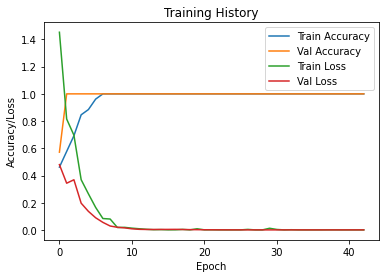

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()


Average Accuracy: 85.28%
              precision    recall  f1-score   support

          HC       0.83      0.90      0.86        21
         MDD       0.89      0.81      0.85        21

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



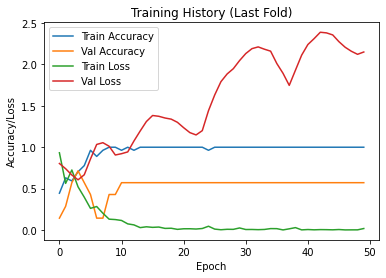

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout



# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
# Assuming each sample is treated as a single timestep
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Define number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to hold results
accuracy_list = []
y_true_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Build and compile the CNN model
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_list.append(accuracy)
    
    # Predict and store results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_true_list.extend(y_test)
    y_pred_list.extend(y_pred)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_list) * 100:.2f}%')

# Print the classification report for all folds
print(classification_report(y_true_list, y_pred_list, target_names=['HC', 'MDD']))

# Optional: Plot training history for the last fold
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History (Last Fold)')
plt.show()


# random forest

In [46]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Initialize and train the model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)
# print(y_test)
# # Evaluate the model
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X_scaled, y_encoded, cv=cv, scoring='accuracy')

print(f'Cross-validated scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')
print(f'Standard deviation: {scores.std()}')

# Cross-validation predictions and evaluation
y_pred_all = []
y_test_all = []

for train_index, test_index in cv.split(X_scaled, y_encoded):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred_all.extend(y_pred)
    y_test_all.extend(y_test)

# Print confusion matrix and classification report for cross-validation
print(confusion_matrix(y_test_all, y_pred_all))
print(classification_report(y_test_all, y_pred_all, target_names=['HC', 'MDD']))


Cross-validated scores: [0.55555556 1.         1.         1.         1.        ]
Mean accuracy: 0.9111111111111111
Standard deviation: 0.17777777777777776
[[18  3]
 [ 1 20]]
              precision    recall  f1-score   support

          HC       0.95      0.86      0.90        21
         MDD       0.87      0.95      0.91        21

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



# logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression
[[4 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# svc

In [48]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
[[4 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# k neighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[4 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# gradient boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
[[3 1]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



# gaussian nb

In [51]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes
[[4 0]
 [1 4]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



# decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
[[2 2]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



# XGBoost

In [53]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost
[[4 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## resting state MDD vs task state MDD

In [54]:
# Load the data
data_ts = pd.read_excel('dot_probe_HC_and_MDD.xlsx')
print(data_ts.shape)
data_ts_MDD=data_ts.iloc[indices_MDD,1:-1]
#data_ts_HC_labels=data_ts.iloc[24:,-1]
print(data_ts_MDD.shape)

(53, 2690)
(17, 2688)


In [55]:
# Load the data
data_rs = pd.read_excel('resting_state_HC_and_MDD.xlsx')
print(data_rs.shape)
data_rs_MDD=data_rs.iloc[indices_MDD,1:-1]
#data_rs_HC_labels=data_rs.iloc[24:,-1]
print(data_rs_MDD.shape)

(53, 2690)
(17, 2688)


In [56]:
data_ts_MDD_labels=np.ones(data_ts_MDD.shape[0])
print(data_ts_MDD_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
data_rs_MDD_labels=np.zeros(data_rs_MDD.shape[0])
print(data_rs_MDD_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
all_features=np.concatenate((data_rs_MDD,data_ts_MDD),axis=0)
all_features.shape

(34, 2688)

In [59]:
all_labels=np.concatenate((data_rs_MDD_labels,data_ts_MDD_labels),axis=0)
all_labels.shape

(34,)

In [60]:
X=all_features
y=all_labels

# LSTM

(34, 2688)
(34,)
shape after scaling
(34, 2688)
shape after reshaping
(34, 1, 2688)
Epoch 1/50
2/2 [==============================] - 5s 1s/step - loss: 0.6951 - accuracy: 0.5238 - val_loss: 0.6558 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6001 - accuracy: 0.9048 - val_loss: 0.6091 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.5374 - accuracy: 1.0000 - val_loss: 0.5712 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.5436 - accuracy: 1.0000 - val_loss: 0.5333 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 0.4881 - accuracy: 0.9524 - val_loss: 0.5023 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 46ms/step - loss: 0.4652 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 0.4636 - accu

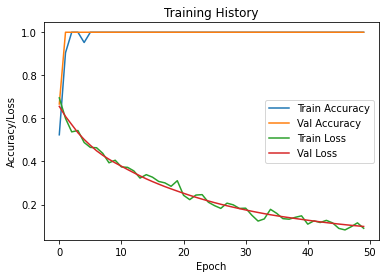

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print(X.shape)
print(y.shape)


#Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("shape after scaling")
print(X_scaled.shape)

X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print("shape after reshaping")
print(X_reshaped.shape)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)



# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()


# TRANSFORMER

Epoch 1/50
2/2 [==============================] - 2s 445ms/step - loss: 0.9351 - accuracy: 0.6190 - val_loss: 0.6134 - val_accuracy: 0.8333
Epoch 2/50
2/2 [==============================] - 0s 118ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.7759e-05 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 128ms/step - loss: 8.5494e-11 - accuracy: 1.0000 - val_loss: 4.3375e-08 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 127ms/step - loss: 1.0040e-11 - accuracy: 1.0000 - val_loss: 9.1189e-11 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 120ms/step - loss: 0.0815 - accuracy: 0.9524 - val_loss: 7.0546 - val_accuracy: 0.8333
Epoch 6/50
2/2 [==============================] - 0s 124ms/step - loss: 0.8320 - accuracy: 0.9048 - val_loss: 1.3264e-14 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 95ms/step - loss: 4.4478e-24 - accuracy: 1.0000 - val_loss: 2.4810 - val_accuracy: 

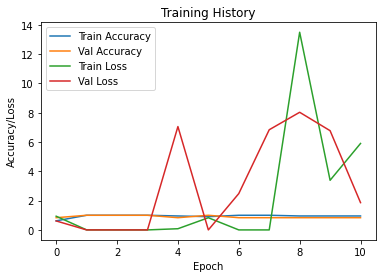

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for Transformer (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Build the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()

# CNN

Epoch 1/50
2/2 [==============================] - 1s 252ms/step - loss: 0.8556 - accuracy: 0.4762 - val_loss: 0.7244 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 0.3340 - accuracy: 0.8571 - val_loss: 1.4876 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 84ms/step - loss: 0.9667 - accuracy: 0.6190 - val_loss: 0.3859 - val_accuracy: 0.8333
Epoch 4/50
2/2 [==============================] - 0s 82ms/step - loss: 0.2499 - accuracy: 0.8571 - val_loss: 0.4801 - val_accuracy: 0.6667
Epoch 5/50
2/2 [==============================] - 0s 92ms/step - loss: 0.4766 - accuracy: 0.8095 - val_loss: 0.5450 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 92ms/step - loss: 0.1405 - accuracy: 1.0000 - val_loss: 0.3762 - val_accuracy: 0.8333
Epoch 7/50
2/2 [==============================] - 0s 90ms/step - loss: 0.1764 - accuracy: 0.8571 - val_loss: 0.2374 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==========

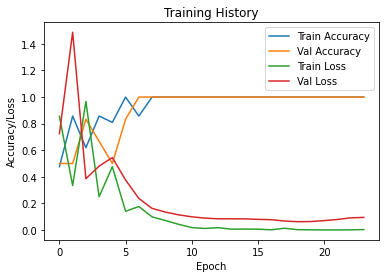

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'MDD' -> 1, 'HC' -> 0

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['HC', 'MDD']))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()


# RANDOM FOREST

# LOGISTIC REGRESSION